In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor,BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [3]:
df=pd.read_csv("Dataset/IBM.csv")
df.sample(5)

,Unnamed: 0,open,high,low,close,volume
2620,2620,192.24,193.36,190.76,192.36,7812600
3489,3489,159.18,162.00,158.68,162.00,7197200
969,969,119.91,121.10,118.87,121.02,4562124
5429,5429,88.05,88.47,86.41,86.45,7298400
4731,4731,80.65,80.65,79.85,80.10,3903200


In [4]:
df.shape

(6319, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6319 entries, 0 to 6318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6319 non-null   int64  
 1   open        6319 non-null   float64
 2   high        6319 non-null   float64
 3   low         6319 non-null   float64
 4   close       6319 non-null   float64
 5   volume      6319 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 296.3 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
open          0
high          0
low           0
close         0
volume        0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,open,high,low,close,volume
count,6319.000000,6319.000000,6319.000000,6319.000000,6319.000000,6.319000e+03
mean,3159.000000,132.168856,133.362993,131.055281,132.233556,5.890934e+06
std,1824.282507,36.828643,36.914261,36.752359,36.851456,3.295211e+06
min,0.000000,54.650000,56.700000,54.010000,55.070000,1.928430e+05
25%,1579.500000,101.625000,103.250000,100.065000,101.915000,3.732344e+06
50%,3159.000000,129.070000,130.000000,128.060000,129.160000,5.047358e+06
75%,4738.500000,157.205000,158.595000,155.785000,156.960000,7.089050e+06
max,6318.000000,238.000000,239.350000,234.220000,238.040000,4.120730e+07


In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
correlation=df.corr()
correlation

,open,high,low,close,volume
open,1.000000,0.999552,0.999541,0.999117,-0.391545
high,0.999552,1.000000,0.999356,0.999568,-0.382921
low,0.999541,0.999356,1.000000,0.999561,-0.401029
close,0.999117,0.999568,0.999561,1.000000,-0.391931
volume,-0.391545,-0.382921,-0.401029,-0.391931,1.000000


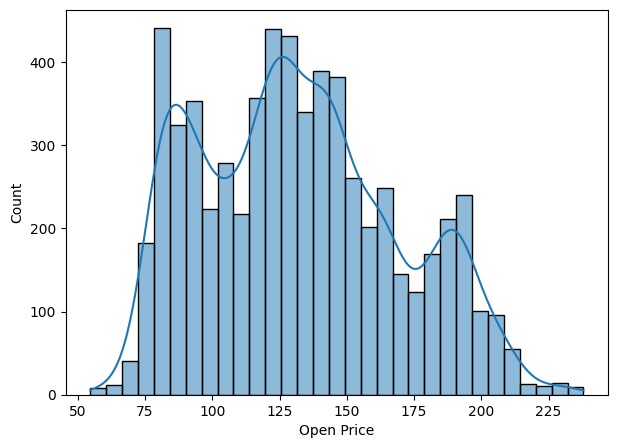

In [11]:
plt.figure(figsize=(7,5))
sns.histplot(df['open'],kde=True)
plt.xlabel('Open Price')
plt.ylabel('Count')
plt.show()

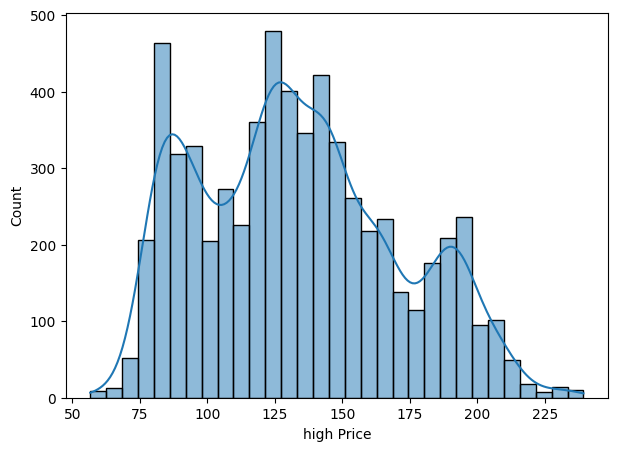

In [12]:
plt.figure(figsize=(7,5))
sns.histplot(df['high'],kde=True)
plt.xlabel('high Price')
plt.ylabel('Count')
plt.show()

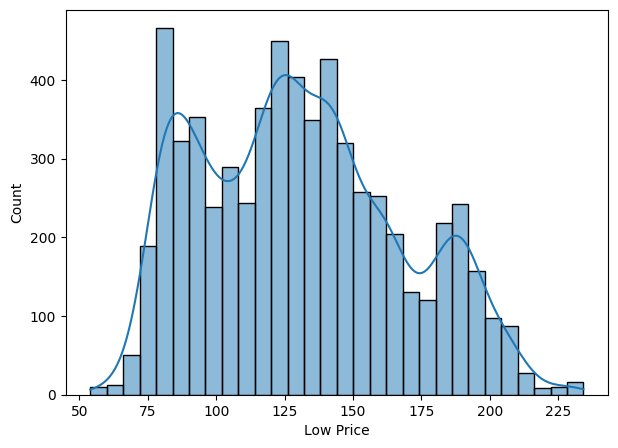

In [13]:
plt.figure(figsize=(7,5))
sns.histplot(df['low'],kde=True)
plt.xlabel('Low Price')
plt.ylabel('Count')
plt.show()

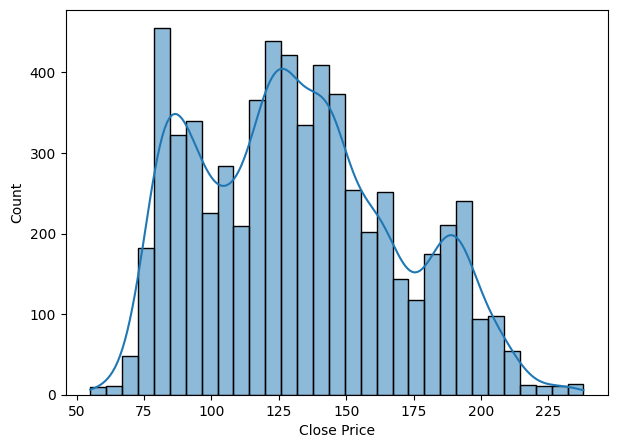

In [14]:
plt.figure(figsize=(7,5))
sns.histplot(df['close'],kde=True)
plt.xlabel('Close Price')
plt.ylabel('Count')
plt.show()

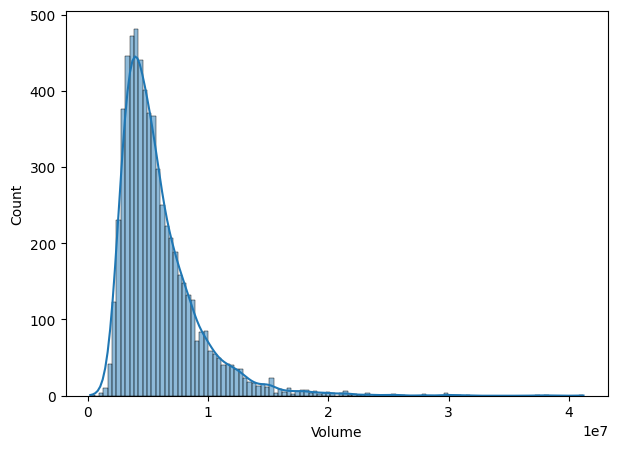

In [15]:
plt.figure(figsize=(7,5))
sns.histplot(df['volume'],kde=True)
plt.xlabel('Volume')
plt.ylabel('Count')
plt.show()

In [16]:
df['volume'].skew()

2.5143459149047347

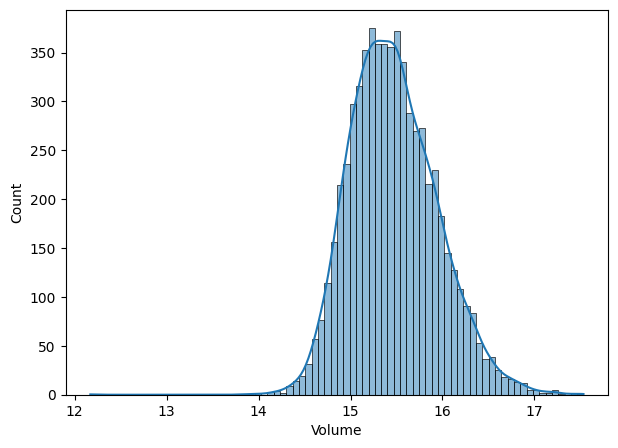

In [17]:
df['volume']=np.log1p(df['volume'])
plt.figure(figsize=(7,5))
sns.histplot(df['volume'],kde=True)
plt.xlabel('Volume')
plt.ylabel('Count')
plt.show()

In [18]:
df['volume'].skew()

0.3730918680330224

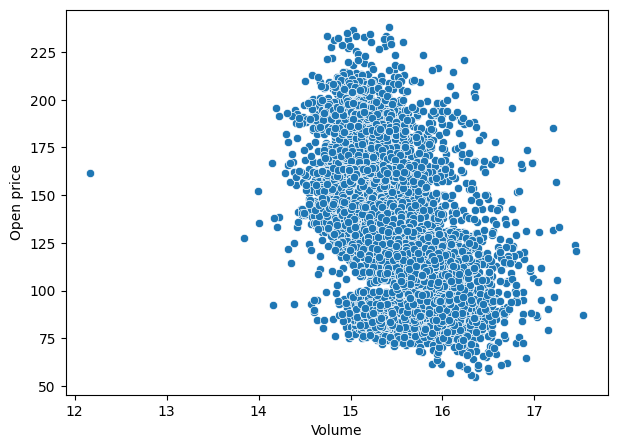

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['volume'],y=df['open'])
plt.xlabel('Volume')
plt.ylabel('Open price')
plt.show()

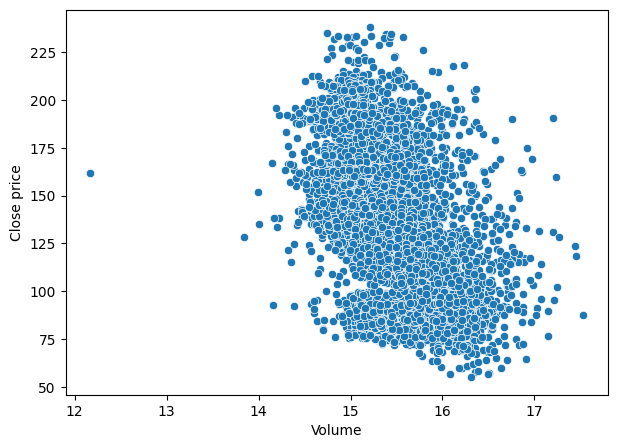

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['volume'],y=df['close'])
plt.xlabel('Volume')
plt.ylabel('Close price')
plt.show()

In [21]:
X=df.drop(columns=['close']).values
Y=df['close'].values

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
# Model 1
model1=LinearRegression()
model1.fit(x_train,y_train)
prediction1=model1.predict(x_test)

print("Model Score :",model1.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction1))
print("MAE :",mean_absolute_error(y_test,prediction1))
print("R2 Score :",r2_score(y_test,prediction1))

Model Score : 0.9996192191657493
MSE : 0.5312609712438698
MAE : 0.5192728296913118
R2 Score : 0.9996275544512299


In [25]:
# Model 2
model2=SGDRegressor()

In [26]:
paramgrid2={
    'alpha':[1e-5,1e-4,1e-3,1e-2,1e-1],
    'max_iter':[1000,2000,3000,5000],
    'penalty':['l2','l1','elasticnet'],
    'learning_rate':['constant','optimal','invscaling'],
    'eta0':[0.001,0.01,0.1],
    'tol':[1e-3,1e-4,1e-5]
}
tune2=RandomizedSearchCV(estimator=model2,param_distributions=paramgrid2)
tune2.fit(x_train,y_train)
print(tune2.best_score_)
print(tune2.best_params_)

C:\Users\pamu\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\pamu\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\pamu\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\pamu\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

0.9995639357357957
{'tol': 0.001, 'penalty': 'l2', 'max_iter': 2000, 'learning_rate': 'optimal', 'eta0': 0.01, 'alpha': 0.0001}


In [41]:
model2=SGDRegressor(tol=0.0001,penalty='l1',max_iter=2000,learning_rate='invscaling',eta0=0.1,alpha=1e-05)
model2.fit(x_train,y_train)
prediction2=model2.predict(x_test)

print("Model Score :",model2.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction2))
print("MAE :",mean_absolute_error(y_test,prediction2))
print("R2 Score :",r2_score(y_test,prediction2))


Model Score : 0.9996016567865059
MSE : 0.5749231997570862
MAE : 0.5505949267660211
R2 Score : 0.999596944631312


In [43]:
# Model 3
poly=PolynomialFeatures(degree=2)
poly_x_train=poly.fit_transform(x_train)
poly_x_test=poly.transform(x_test)

model3=LinearRegression()
model3.fit(poly_x_train,y_train)
prediction3=model3.predict(poly_x_test)

print("Model3 Score :",model3.score(poly_x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction3))
print("MAE :",mean_absolute_error(y_test,prediction3))
print("R2 Score :",r2_score(y_test,prediction3))

Model3 Score : 0.9996216230853039
MSE : 0.5250306566230298
MAE : 0.5153668095036926
R2 Score : 0.9996319222724581


In [29]:
# Model 4
model4=DecisionTreeRegressor()

In [30]:
paramgrid4={
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4,6],
    'splitter':['best','random'],
    'criterion':['squared_error','absolute_error'],
    'max_leaf_nodes':[None,10,20,30],
    'min_impurity_decrease':[0.0,0.01,0.1]
}

tune4=RandomizedSearchCV(estimator=model4,param_distributions=paramgrid4)
tune4.fit(x_train,y_train)
print(tune4.best_score_)
print(tune4.best_params_)

0.9989240509565314
{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': None, 'max_depth': 40, 'criterion': 'squared_error'}


In [44]:
model4=DecisionTreeRegressor(splitter='random',min_samples_split=10,min_samples_leaf=2,min_impurity_decrease=0.0,max_leaf_nodes=None,max_depth=None,criterion='squared_error')
model4.fit(x_train,y_train)
prediction4=model4.predict(x_test)

print("Model Score :",model4.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction4))
print("MAE :",mean_absolute_error(y_test,prediction4))
print("R2 Score :",r2_score(y_test,prediction4))

Model Score : 0.9995884766431741
MSE : 1.1679995985856422
MAE : 0.7389094867641147
R2 Score : 0.9991811627900313


In [32]:
# Model 5
model5=XGBRegressor()

In [33]:
paramgrid5={
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,6,10],
    'min_child_weight':[1,3,5],
    'subsample':[0.7,0.8,1.0],
    'colsample_bytree':[0.7,0.8,1.0],
    'gamma':[0,0.1,0.2],
    'reg_alpha':[0,0.01,0.1],
    'reg_lambda':[0.1,1,10]
}

tune5=RandomizedSearchCV(estimator=model5,param_distributions=paramgrid5)
tune5.fit(x_train,y_train)
print(tune5.best_score_)
print(tune5.best_params_)

0.9993155102319967
{'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 0.01, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [45]:
model5=XGBRegressor(subsample=0.8,reg_lambda=0.1,reg_alpha=0.1,n_estimators=100,min_child_weight=5,max_depth=10,learning_rate=0.1,gamma=0.1,colsample_bytree=0.8)
model5.fit(x_train,y_train)
prediction5=model5.predict(x_test)

print("Model Score :",model5.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction5))
print("MAE :",mean_absolute_error(y_test,prediction5))
print("R2 Score :",r2_score(y_test,prediction5))


Model Score : 0.9998172975266681
MSE : 0.9285189578932462
MAE : 0.6705757272696193
R2 Score : 0.9993490529673084


In [35]:
# Model 6
model6=KNeighborsRegressor()

In [36]:
paramgrid6={
    'n_neighbors':[3,5,7,10,15],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'leaf_size':[20,30,40],
    'p':[1,2]
}

tune6=RandomizedSearchCV(estimator=model6,param_distributions=paramgrid6)
tune6.fit(x_train,y_train)
print(tune6.best_score_)
print(tune6.best_params_)

0.9989411902369986
{'weights': 'distance', 'p': 1, 'n_neighbors': 15, 'leaf_size': 30, 'algorithm': 'auto'}


In [46]:
model6=KNeighborsRegressor(weights='distance',p=1,n_neighbors=7,leaf_size=30,algorithm='brute')
model5.fit(x_train,y_train)
prediction5=model5.predict(x_test)

print("Model Score :",model5.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction5))
print("MAE :",mean_absolute_error(y_test,prediction5))
print("R2 Score :",r2_score(y_test,prediction5))

Model Score : 0.9998172975266681
MSE : 0.9285189578932462
MAE : 0.6705757272696193
R2 Score : 0.9993490529673084


In [38]:
# Model 7 
model7=SVR()

In [47]:
paramgrid7={
    'C':[0.1,1,10,100],
    'epsilon':[0.01,0.1,0.2,0.5],
    'kernel':['linear','poly','rbf','sigmoid'],
    'degree':[2,3,4],
    'gamma':['scale','auto',0.1,0.5],
    'coef0':[0,0.1,1]
}

tune7=RandomizedSearchCV(estimator=model7,param_distributions=paramgrid7)
tune7.fit(x_train,y_train)
print(tune7.best_score_)
print(tune7.best_params_)


0.9996122354288455
{'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.2, 'degree': 2, 'coef0': 0, 'C': 100}


In [48]:
model7=SVR(kernel='linear',gamma='scale',epsilon=0.01,degree=2,coef0=0,C=0.1)
model7.fit(x_train,y_train)
prediction7=model7.predict(x_test)

print("Model Score :",model7.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction7))
print("MAE :",mean_absolute_error(y_test,prediction7))
print("R2 Score :",r2_score(y_test,prediction7))

Model Score : 0.9992806502653295
MSE : 1.0750451707669633
MAE : 0.7505102319585906
R2 Score : 0.9992463293743533


In [49]:
estimators=[('LR',model1),
            ('SGD',model2),
            ('PolyLR',model3),
            ('Tree',model4),
            ('XGB',model5),
            ('KNN',model6),
            ('SVM',model7)]

In [50]:
# Model 8
model8=VotingRegressor(estimators=estimators)
model8.fit(x_train,y_train)
prediction8=model8.predict(x_test)

print("Model Score :",model8.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction8))
print("MAE :",mean_absolute_error(y_test,prediction8))
print("R2 Score :",r2_score(y_test,prediction8))


Model Score : 0.9997638605842122
MSE : 0.6934261802168112
MAE : 0.5998643121077006
R2 Score : 0.9995138669915508


In [51]:
# Model 9
model9=BaggingRegressor()

In [52]:
paramgrid9={
    'n_estimators':[10,50,100,200],
    'max_samples':[0.5,0.7,1.0],
    'bootstrap':[True,False],
    'bootstrap_features':[True,False],
    'random_state':[42,50,100],
    }

tune9=RandomizedSearchCV(estimator=model9,param_distributions=paramgrid9)
tune9.fit(x_train,y_train)
print(tune9.best_score_)
print(tune9.best_params_)

0.9994410035195791
{'random_state': 42, 'n_estimators': 200, 'max_samples': 0.5, 'bootstrap_features': False, 'bootstrap': True}


In [53]:
model9=BaggingRegressor(random_state=50,n_estimators=200,max_samples=0.5,bootstrap_features=False,bootstrap=False)
model9.fit(x_train,y_train)
prediction9=model9.predict(x_test)

print("Model Score :",model9.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction9))
print("MAE :",mean_absolute_error(y_test,prediction9))
print("R2 Score :",r2_score(y_test,prediction9))

Model Score : 0.9998652852879081
MSE : 0.7564282834473621
MAE : 0.6180243805379723
R2 Score : 0.99946969876881


In [54]:
# Model 10
model10=RandomForestRegressor()

In [55]:
paramgrid10={
    'n_estimators':[100,200,500],
    'max_depth':[10,20,50,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['sqrt','log2'],
    'bootstrap':[True,False],
    'random_state':[21,42,84,168]
}

tune10=RandomizedSearchCV(estimator=model10,param_distributions=paramgrid10)
tune10.fit(x_train,y_train)
print(tune10.best_score_)
print(tune10.best_params_)

0.9994346717797612
{'random_state': 21, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [56]:
model10=RandomForestRegressor(random_state=42,n_estimators=100,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',max_depth=20,bootstrap=True)
model10.fit(x_train,y_train)
prediction10=model10.predict(x_test)

print("Model Score :",model10.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction10))
print("MAE :",mean_absolute_error(y_test,prediction10))
print("R2 Score :",r2_score(y_test,prediction10))

Model Score : 0.9998352603330439
MSE : 0.8080758717463484
MAE : 0.6336782952349264
R2 Score : 0.9994334907365849


In [57]:
#Model 11
model11=AdaBoostRegressor()

In [58]:
paramgrid11={
    'n_estimators':[50,100,200,500],
    'learning_rate':[0.01,0.1,0.5,1.0],
    'loss':['linear','square','exponential'],
}

tune11=RandomizedSearchCV(estimator=model11,param_distributions=paramgrid11)
tune11.fit(x_train,y_train)
print(tune11.best_score_)
print(tune11.best_params_)

0.9979671898170059
{'n_estimators': 200, 'loss': 'square', 'learning_rate': 0.5}


In [59]:
model11=AdaBoostRegressor(n_estimators=200,loss='square',learning_rate=0.5)
model11.fit(x_train,y_train)
prediction11=model11.predict(x_test)

print("Model Score :",model11.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction11))
print("MAE :",mean_absolute_error(y_test,prediction11))
print("R2 Score :",r2_score(y_test,prediction11))

Model Score : 0.9980074099543494
MSE : 3.052685326182606
MAE : 1.3930745633044708
R2 Score : 0.9978598859636334


In [60]:
# Model 12
model12=GradientBoostingRegressor()

In [61]:
paramgrid12={
    'n_estimators':[50,100,200,500],
    'learning_rate':[0.01,0.1,0.5,1.0],
    'max_depth':[10,20,50,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['sqrt','log2'],
    'subsample':[0.6,0.8,1.0],
    'loss':['squared_error','absolute_error','quantile']
}

tune12=RandomizedSearchCV(estimator=model12,param_distributions=paramgrid12)
tune12.fit(x_train,y_train)
print(tune12.best_score_)
print(tune12.best_params_)

0.9988747491662535
{'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'loss': 'squared_error', 'learning_rate': 1.0}


In [62]:
model12=GradientBoostingRegressor(subsample=1.0,n_estimators=50,min_samples_split=10,min_samples_leaf=2,max_features='log2',max_depth=20,loss='squared_error',learning_rate=0.5)
model12.fit(x_train,y_train)
prediction12=model12.predict(x_test)

print("Model Score :",model12.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,prediction12))
print("MAE :",mean_absolute_error(y_test,prediction12))
print("R2 Score :",r2_score(y_test,prediction12))

Model Score : 0.9999995131882307
MSE : 1.0338407423148772
MAE : 0.6965277161129678
R2 Score : 0.9992752161301989


In [64]:
log_trf=FunctionTransformer(np.log1p,validate=True)

In [69]:
step1=ColumnTransformer(transformers=[
    ("Transform 1",log_trf,[3]),
    ('Transform 2',StandardScaler(),[0,1,2,3])
],remainder="passthrough")

step2=model10

pipe=Pipeline(steps=[
    ('Column Transformations',step1),
    ('Model',step2)
])

pipe.fit(x_train,y_train)
p=pipe.predict(x_test)

print("Model Score :",pipe.score(x_train,y_train))
print("MSE :",mean_squared_error(y_test,p))
print("MAE :",mean_absolute_error(y_test,p))
print("R2 Score :",r2_score(y_test,p))

C:\Users\pamu\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_function_transformer.py:348: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


Model Score : 0.9444111018613832
MSE : 71.18918017853042
MAE : 7.0714712508842315
R2 Score : 0.9500921492199716


C:\Users\pamu\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_function_transformer.py:348: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
C:\Users\pamu\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_function_transformer.py:348: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


In [70]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))